# Исследование закономерностей определяющих успешность игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Представлены данные до 2016 года. Необходимо спланировать кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

**Цель исследования:** выявление закономерностей, определяющих успешность игры, проверка гипотез:

- cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- cредние пользовательские рейтинги жанров Action и Sports разные.

**Ход исследования:**
Данные представлены в таблицe: `games.csv`. О качестве данных ничего не известно, поэтому потребуется предобработка данных.

Исследование пройдет в 5 этапов:

- обзор данных;
- предобработка данных;
- анализ данных;
- портрет пользователя;
- проверка гипотез

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-данных-на-аномалии-и-исправление" data-toc-modified-id="Проверка-данных-на-аномалии-и-исправление-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка данных на аномалии и исправление</a></span></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li><li><span><a href="#Добавляем-данные-в-таблицу" data-toc-modified-id="Добавляем-данные-в-таблицу-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Добавляем данные в таблицу</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Портрет-пользователя" data-toc-modified-id="Портрет-пользователя-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-первой-гипотезы" data-toc-modified-id="Проверка-первой-гипотезы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка первой гипотезы</a></span></li><li><span><a href="#Проверка-второй-гипотезы" data-toc-modified-id="Проверка-второй-гипотезы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка второй гипотезы</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Сборный проект-1/games.csv')
   
except FileNotFoundError:
    games = pd.read_csv('/datasets/games.csv')

games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info() #получаем информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице games 11 столбцов и 16715 строк, тип данных представленный в таблице object, float64. 

Согласно документации к таблице:
- `Name` — название игры 
- `Platform` — платформа 
- `Year_of_Release` — год выпуска 
- `Genre` — жанр игры 
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий) 
- `EU_sales` — продажи в Европе (миллионы проданных копий) 
- `JP_sales` — продажи в Японии (миллионы проданных копий) 
- `Other_sales` — продажи в других странах (миллионы проданных копий) 
- `Critic_Score` — оценка критиков (максимум 100) 
- `User_Score` — оценка пользователей (максимум 10) 
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

Данные за 2016 год могут быть неполными.

**Выводы:** 
Таблица 'games.csv' содержит столбцы с данными об играх: название, платформа, год выпуска, жанр, также количество проданных копий в Северной Америке, Европе, Японии и других странах, и оценки критиков, пользователей и рейтинг от организации ESRB.
Обнаружены и требуют исправления:
- некорректные названия столбцов;
- типы данных в столбцах требуют замены;
- пропущенные значения в столбцах:  `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

## Предобработка данных

Сначала приведем все названия столбцов таблицы, а также категориальные столбцы к нижнему регистру.

In [4]:
games.columns =games.columns.str.lower() # приводим названия столбцов к нижнему регистру
games['name'] = games['name'].str.lower() # приводим содержание столбцов к нижнему регистру
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating'] = games['rating'].str.lower()
games.head() # проверяем произведенные изменения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Проверка данных на аномалии и исправление

Для проверки данных на аномалии воспользуемся методом describe() с параметром 'include', чтобы получить описание в столбцах, содержащих не только количественные, но и качественные данные. 

In [5]:
games.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,16713,11559,need for speed: most wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,16715,31,ps2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
genre,16713,12,action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
user_score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В описании данных видим, что в столбце `name` отсутствуют 2 значения, уникальных названий игр 11559, самая часто встречающаяся игра 'Need for Speed: Most Wanted' (12), уникальных платформ 31, самая распространенная PS2 (2161), уникальных жанров игр 12, самый популярный жанр Action (3369).
Проверим адекватность данных, в документации указано, что `Critic_Score`- максимум 100, это соответствует описанию данных, а  `User_Score` - максимум 10, но в описании указано tbd (2424 значения) - это значит, что рейтинг игре еще не выставлен, что можно рассматривать, как пропущенные значения.
Данные в столбце `year_of_release` соответствуют действительности самый ранний год 1980, а последний 2016.
В столбце `rating` также присутствует большое количество пропущенных значений, самым популярным рейтингом является - 'E'(3990).

Проверим на аномалии столбец `rating`. Согласно: https://dic.academic.ru/dic.nsf/ruwiki/140779, cуществующие рейтинги ESRB для игр:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older»)
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «От 17 лет»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending»") — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. 

Устаревшие:
- «K-A» («Kids to Adults»)— «Для детей и взрослых»

In [6]:
games['rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
k-a        3
rp         3
ao         1
Name: rating, dtype: int64

Аномалий в значениях не обнаружено.

### Пропущенные значения

Подсчитаем процент пропущенных значений по каждому столбцу.

In [7]:
# считаем процент пропущенных значений в каждом столбце
(games.isna().sum()/len(games)*100).sort_values().round(1) 

platform            0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
name                0.0
genre               0.0
year_of_release     1.6
user_score         40.1
rating             40.5
critic_score       51.3
dtype: float64

В таблице присутствуют пропущенные значения в столбцах: `year_of_release`, `user_score`, `rating`, `critic_score`, но в обзоре данных мы также обнаружили по 2 пропущенных значения в столбцах `name` и `genre`. Обработаем данные пропуски.

In [8]:
# Выведем строки с пропущенными названиями игр
games.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущенные значения в столбцах `name` и `genre` присутствуют в одних и тех же строках, скорее всего эта ошибка возникла при заполнении данных, т.к. восстановить их не представляется возможным и количество строк ничтожно мало, то удалим эти строки из таблицы.

In [9]:
# удаляем строки с пропущенным значением в столбце 'name'
games.dropna(subset=['name'], inplace=True)
games.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропущенные значения в столбцах `name` и `genre` удалены. 

Подсчитаем количество пропущенных значений в столбце `year_of_release`, а также посмотрим как распределяются пропущенные значения относительно других столбцов, есть ли закономерность в пропущенных значениях.

In [10]:
games['year_of_release'].isna().value_counts()

False    16444
True       269
Name: year_of_release, dtype: int64

In [11]:
games.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущенные значения в столбце `year_of_release`, могли появиться в результате случайной ошибки заполнения данных. Пропущенные значения не связаны с названием игры, платформой, жанром, продажами или рейтингом, т.е. являются абсолютно случайными.  Заполним средним значением исходя из названия платформы, т.к. игры выпускались в период популярности платформы, а при обновлении платформы новые игры выпускались уже для нее.

In [12]:
games['year_of_release'] = games.groupby('platform')['year_of_release'].apply(lambda s: s.fillna(s.mean()))
games['year_of_release'].isna().value_counts() # проверяем количество пропущенных значений

False    16713
Name: year_of_release, dtype: int64

Столбец `rating` содержит большое количество пропусков, заполним пропущенные значения значением рейтинга RP (рейтнг ожидается). Также сократим количество категорий, объединив устаревший рейтинг K-A и рейтинг EC (для детей младшего возраста, т.к. если он подходит для детей младшего возраста, то подойдет и всем), с рейтингом  E (для всех).

In [13]:
games['rating'] = games['rating'].fillna('rp')
games['rating'] = games['rating'].replace(['k-a', 'ec'], 'e')

games['rating'].value_counts() # проверим произведенные изменения

rp      6767
e       4001
t       2961
m       1563
e10+    1420
ao         1
Name: rating, dtype: int64

Пропущенных значений в столбцах `critic_score` и `user_score` слишком много, корректно заполнить пропущенные данные не представляется возможным, а удаление такого большого количества данных может повлиять на результаты исследования, заполнение значением '0', также может повлиять на ход исследования, привести к смещению данных,  поэтому оставим данные столбцы без изменения, т.к. пропущенные значения не влияют на результаты исследования, а объем данных с полными данными достаточно велик. Эти пропущенные значения могли появиться вследствие ошибки при выгрузке данных.

В столбце `user_score` указан "tbd" - это означает, что рейтинг игры еще ожидается, подсчитаем количество значений в данном столбце.

In [14]:
len(games.query('user_score == "tbd"'))

2424

Заменим значения "tbd" в столбце `user_score` на пропущенные значения, чтобы можно было производить математические расчеты с данным столбцом.

In [15]:
games.loc[games['user_score'] == "tbd", 'user_score'] = np.nan

### Изменение типов данных

Заменим тип столбца `year_of_release` на 'int', заменим тип данных столбца `user_score` на 'float'.

In [16]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [17]:
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


### Удаление дубликатов

Подсчитаем количество явных дубликатов данных.

In [18]:
games.duplicated().sum()

0

Явных дубликатов не обнаружено. Проверим неявные дубликаты в столбцах, содержащих качественные значения: `platform` и `genre`

In [19]:
games['platform'].value_counts()

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

In [20]:
games['genre'].value_counts()

action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64

Неявных дубикатов в данных не обнаружено.

### Добавляем данные в таблицу
Добавим в таблицу столбец `total_sales` в который запишем суммарные продажи по всем регионам. 

In [21]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [22]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,rp,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,rp,31.38


**Выводы:**

Обработали пропущенные значения в столбцах `name`, `genre`, `year_of_release`, `user_score`, `rating`, `critic_score`.
Привели  столбцы `year_of_release` к типу 'int', столбец `user_score` к 'float'.
В данных не обнаружены явные и неявные дубликаты.
Добавили в таблицу столбец с суммарным значением продаж по всем регионам.
Данные обработаны и готовы к анализу.

## Анализ данных

Проверим распределение количества игр по годам. Построим гистограмму по столбцу `year_of_release`.

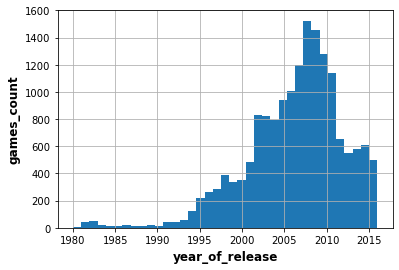

In [23]:
ax = games.hist(column='year_of_release', bins=37, grid=True)
ax = ax[0]
ax[0].set_title("")
ax[0].set_xlabel("year_of_release", labelpad=5, weight='bold', size=12)
ax[0].set_ylabel("games_count", labelpad=5, weight='bold', size=12);

Из гистограммы видно, что до 1993 года выпускалось очень мало игр, пик по объему выпускаемых игр приходится на 2007-2011, с 2012 количество игр резко пошло на спад.

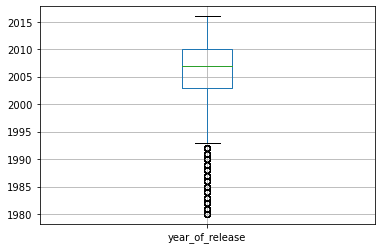

In [24]:
games.boxplot('year_of_release');

Посмотрим, как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [25]:
games_platform = games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
games_platform

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   39.38
         1983                    5.84
         1984                    0.27
...                               ...
xb       2008                    0.18
xone     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

In [26]:
# вычислим топ-5 платформ с наибольшим количеством проданных копий игр
games_platform_top = (
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum').round(2)
)
games_platform_top.columns = ['total_sales']
games_platform_top = games_platform_top.sort_values(by='total_sales', ascending=False, axis=0).reset_index().head(5)
games_platform_top

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


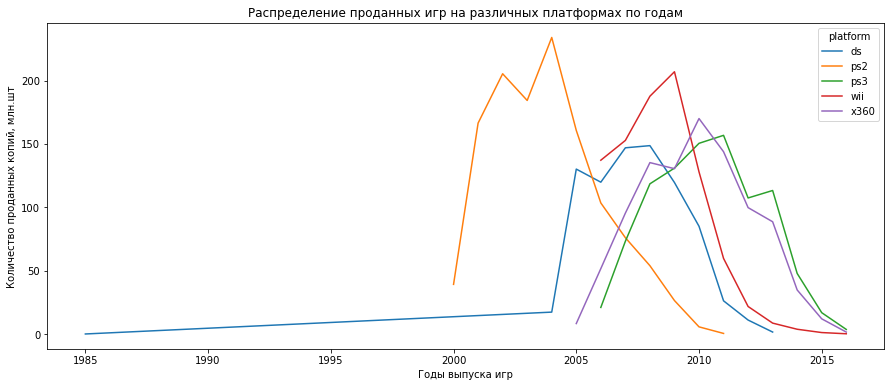

In [27]:
top = games_platform_top['platform']
games_platform = games_platform.query("platform in @top").reset_index()
plt.figure(figsize=(15,6))
plt.title('Распределение проданных игр на различных платформах по годам')
plt.xlabel('Годы выпуска игр')
plt.ylabel('Количество проданных копий, млн.шт')
sns.lineplot(x='year_of_release', y='total_sales',  hue='platform',  data=games_platform);

Выбивается из общей тенденции платформа DS. Сгруппируем и отсортируем данные по году выпуска, чтобы рассмотреть период времени выпуска платформы DS. 

In [28]:
games.query('platform == "ds"').groupby('year_of_release')['year_of_release'].count().sort_values()


year_of_release
1985      1
2013      8
2004     23
2012     23
2005    118
2011    153
2006    201
2010    323
2007    376
2009    403
2008    522
Name: year_of_release, dtype: int64

Полученные данные указывают на то, что запись об игре в 1985 году является ошибочной. Отсортируем данные по правильному периоду выпуска игр для платформы DS.

In [29]:
games = games.query(('platform == "ds"') and ('year_of_release >= 2004')) # фильтруем таблицу для платформы DS
games.query('platform == "ds"').groupby('year_of_release')['year_of_release'].count().sort_values() # проверяем полученные результаты


year_of_release
2013      8
2004     23
2012     23
2005    118
2011    153
2006    201
2010    323
2007    376
2009    403
2008    522
Name: year_of_release, dtype: int64

Из графика видно, что характерным временем появления и исчезновения платформ является - **10 лет**. Наибольшее количество платформ появилось в период начиная с 2005 года. 
При анализе данных учитываем, что согласно документации данные за 2016 год могут быть не полными. С 2010 года отмечается общее снижение количества приобретаемых игр,а с 2013 резкое сокращение количества проданных копий и дальнейшая тенденция к снижению, скорее всего это связано с потерей популярности игр на платформах и развитие новых направлений игр. Актуальными на 2016 год остаются платформы Wii, X360 и PS3. По количеству проданных копий за период с 2005 года лидирует Wii, но с 2009 она потеряла свою популярность и сильно отстает от платформ X360 и PS3, которые можно назвать потенциально прибыльными. Для более корректного прогноза на 2017 год, будем использовать данные с **2013 года**, т.к. после этого года заметно резкое снижение количества игр.

Создадим переменную actual_games в которую запишем данные об играх за актуальный период с 2013 года.

In [30]:
actual_games = games.query('year_of_release >= 2013').reset_index(drop=True)
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,rp,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,rp,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2237,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
2238,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
2239,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
2240,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

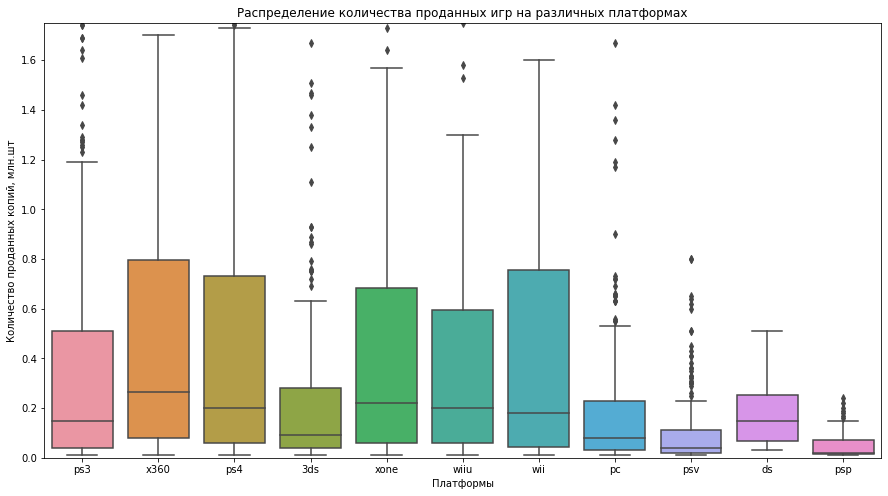

In [31]:
plt.figure(figsize=(15,8))
plt.title('Распределение количества проданных игр на различных платформах')
sns.boxplot(x='platform', y='total_sales', data=actual_games)
plt.xlabel('Платформы')
plt.ylabel('Количество проданных копий, млн.шт')
plt.ylim(0, 1.75);

За актуальный период наибольшее количество проданных игр было у платформ **X360, PS4, XOne, WiiU, Wii**. Наименьшее количество игр у платформ PS3, PC, PSV, DC, PSP. В среднем популярные платформы продают по **0,2 млн.** копий игр, а наименее популярные меньше 0,05 млн.шт. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [32]:
actual_games.query('platform == "ps4"')[['platform', 'critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


In [33]:
# создаем функцию для построения матрицы диаграммы рассеивания по платформе
def platform_sales_corr(platform):
    actual_games_matrix = actual_games.query('platform == @platform')[['platform', 'critic_score', 'user_score', 'total_sales']]
    return pd.plotting.scatter_matrix(actual_games_matrix, figsize=(7, 7))


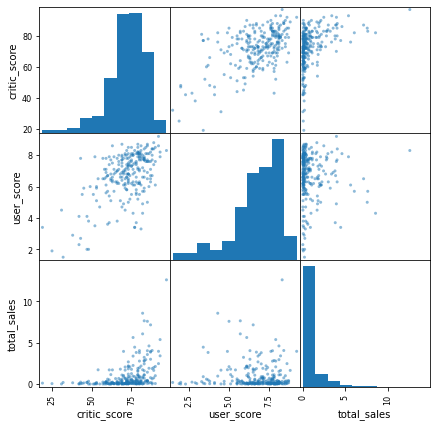

In [34]:
# применяем функцию platform_sales_corr для платформы 'PS4'
platform_sales_corr('ps4');

Из диаграммы рассеивания видно, что связь оценки критиков и общих продаж игр на платформе **'ps4'** прямая и умеренная, а оценки пользователей вообще не влияют на количество проданных копий (связь отсутствует). Связь оценок пользователей и оценок критиков прямая и заметная.

Сравним полученные выводы с продажами игр на других платформах.

In [35]:
# рассчитаем корреляцию для платформы "x360"
actual_games.query('platform == "x360"')[['platform', 'critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
total_sales,0.350345,-0.011742,1.000000


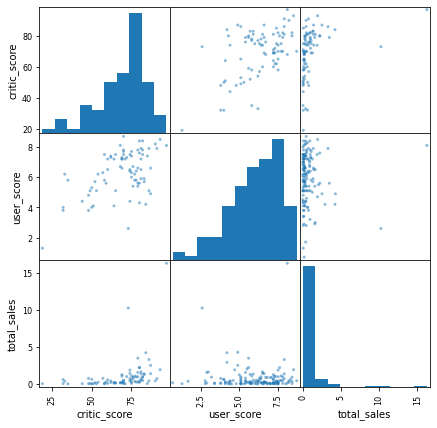

In [36]:
platform_sales_corr('x360');

Связь общего количества проданных копий на платформе **'x360'** с оценкой критиков прямая и умеренная, а оценки пользователей вообще не влияют на количество проданных копий (связь отсутсвует). Связь оценок пользователей и оценок критиков прямая и заметная.

In [37]:
actual_games.query('platform == "xone"')[['platform', 'critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


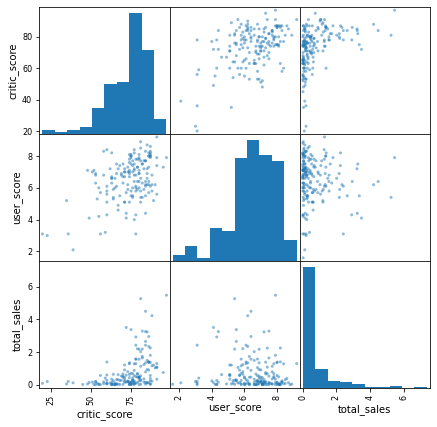

In [38]:
platform_sales_corr('xone');

Связь общих продаж игр и оценок критиков на платформе **'xone'** прямая и умеренная, а оценки пользователей вообще не влияют на количество проданных копий (связь отсутсвует). Связь оценок пользователей и оценок критиков прямая и умеренная.

In [39]:
actual_games.query('platform == "wiiu"')[['platform', 'critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.721313,0.376415
user_score,0.721313,1.000000,0.419330
total_sales,0.376415,0.419330,1.000000


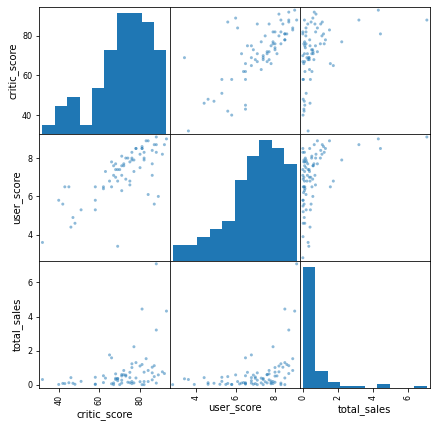

In [40]:
platform_sales_corr('wiiu');

Связь общего количество проданных копий на платформе **'wiiu'** от оценки критиков, прямая и умеренная, а оценки пользователей немного сильнее влияют на количество проданных копий (связь прямая и умеренная). Связь оценок пользователей и оценок критиков прямая и высокая.

In [41]:
len(actual_games.query('platform == "wii"'))

23

Данных для платформы **wii** недостаточно для формирования корректных выводов.

In [42]:
# распределение игр по жанрам
actual_games_genre = (
    actual_games
    .pivot_table(index='genre', values='total_sales', aggfunc='sum').round(2)
)
actual_games_genre = actual_games_genre.sort_values(by='total_sales', ascending=False, axis=0).reset_index()
actual_games_genre

,genre,total_sales
0,action,322.27
1,shooter,233.05
2,sports,150.67
3,role-playing,146.18
4,misc,62.82
5,platform,42.63
6,racing,39.98
7,fighting,35.31
8,adventure,23.73
9,simulation,22.25


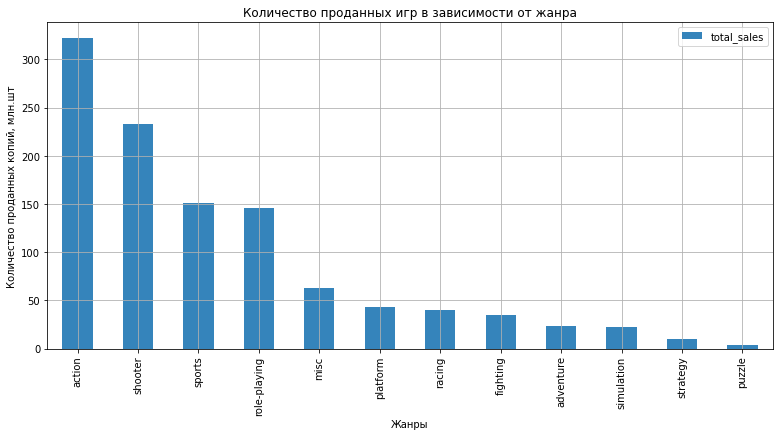

In [43]:
actual_games_genre.plot(x='genre', y='total_sales', grid=True,figsize=(13,6),kind='bar', alpha=0.9)
plt.title('Количество проданных игр в зависимости от жанра')
plt.xlabel('Жанры')
plt.ylabel('Количество проданных копий, млн.шт')
plt.show()

Для более точного анализа прибыльности построим для жанров диаграммы размаха.

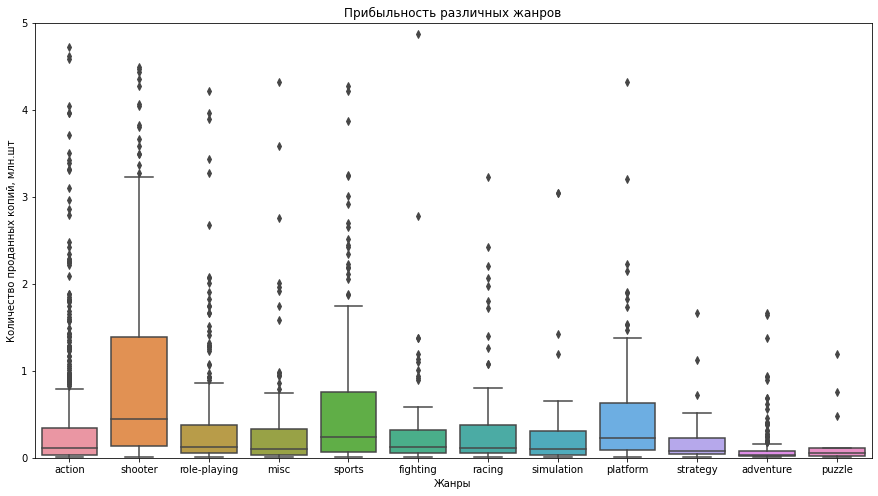

In [44]:
plt.figure(figsize=(15,8))
plt.title('Прибыльность различных жанров')
sns.boxplot(x='genre', y='total_sales', data=actual_games)
plt.xlabel('Жанры')
plt.ylabel('Количество проданных копий, млн.шт')
plt.ylim(0, 5);

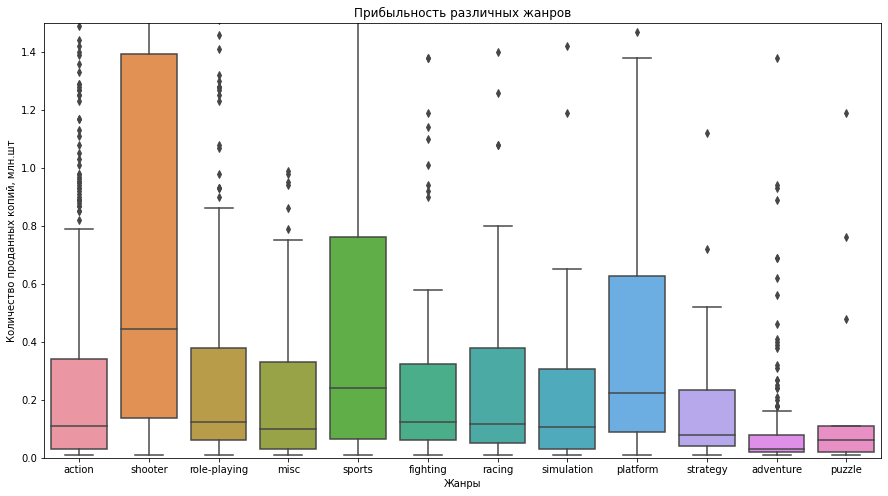

In [45]:
plt.figure(figsize=(15,8))
plt.title('Прибыльность различных жанров')
sns.boxplot(x='genre', y='total_sales', data=actual_games)
plt.xlabel('Жанры')
plt.ylabel('Количество проданных копий, млн.шт')
plt.ylim(0, 1.5);

Самым популярными жанрами по общему количеству проданных копий являются жанры: 'Action', 'Shooter'. Столбчатая диаграмма показала наибольшую прибыльность жанра 'action', но на диаграмме размаха видим, что большинство значений это выбросы. Медианное значение количества проданных копий больше у жанров: 'shooter', 'sport', 'platform'. Продажи этих жанров также более стабильны и имеют более широкий интервал успешно продающихся игр. Сделаем вывод, что жанрами приносящими наибольшую прибыль являются: 'shooter', 'sport', 'platform'. Меньше всего прибыли приносит жанр 'adventure'.

**Выводы:**
Рассмотрели распределение общих продаж игр за каждый год. Пик по объему выпускаемых игр приходится на 2007-2011, с 2012 количество игр резко пошло на спад.

Определили *топ-5* самых прибыльных платформ: *PS2,  X360, PS3, Wii, DS*.
Построили распределение количества проданных игр в зависимости от платформы за все годы. Определили **срок актуальности** платформы – **10 лет**. 

Определили **актуальный период с 2013 по 2016 год**, который можно будет использовать для прогноза продаж игр на 2017 год . Т.к. после 2013 года наблюдается снижение общего числа проданных копий игр и соответственно прогноз будет более реалистичным. 

Для установленного актуального периода посмотрели распределение количества проданных игр по каждой платформе, определили **наиболее перспективные платформы: PS4, XOne, X360, WiiU**. 

Рассмотрели зависимость объема проданных игр в зависимости от оценок пользователей и оценок критиков по каждой популярной платформе: 
- для всех платформ связь общих **продаж и оценок критиков прямая и умеренная**; 
- для платформ  'ps4' , 'x360',  'xone' **связь оценок пользователей с количеством проданных копий отсутствует**, выделяется платформа 'wiiu' (связь прямая и умеренная);
- связь **оценок пользователей и оценок критиков** для платформ 'ps4',  'x360' **прямая и заметная**, для платформы 'xone' прямая и **умеренная**, а для платформы 'wiiu' прямая и **высокая**. 


Самое большое количеству проданных игр у жанров: 'Action', 'Shooter', высокие продажи у игр жанров 'Sport' и 'Role-Playing', самые низкие продажи у игр жанра 'Puzzle'. Однако по диаграмме размаха видно, что жанрами приносящими наибольшую прибыль являются: **'shooter', 'sport', 'platform'**. Меньше всего прибыли приносит жанр 'adventure'.


## Портрет пользователя

Составим портрет пользователя отдельно для каждого региона. В рейтинг для каждого региона войдут:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе.

In [46]:
# Функция для построения графика, на вход поступает: столбец, название региона, место расположения

def top_5(column, region, ax):
    plot = (
        actual_games
        .groupby(column).agg({region: 'sum'})
        .sort_values(by=region, ascending=False)
        .head(5)
        .plot(kind='bar', grid=True, ax=axes[ax], fontsize=18)
    )
    plot.legend('')
    plot.set_xlabel('')
    plot.title.set_size(20)

Построим рейтинг топ-5 самых популярных платформ по регионам, применим метод top_5() к столбцу `platform`.

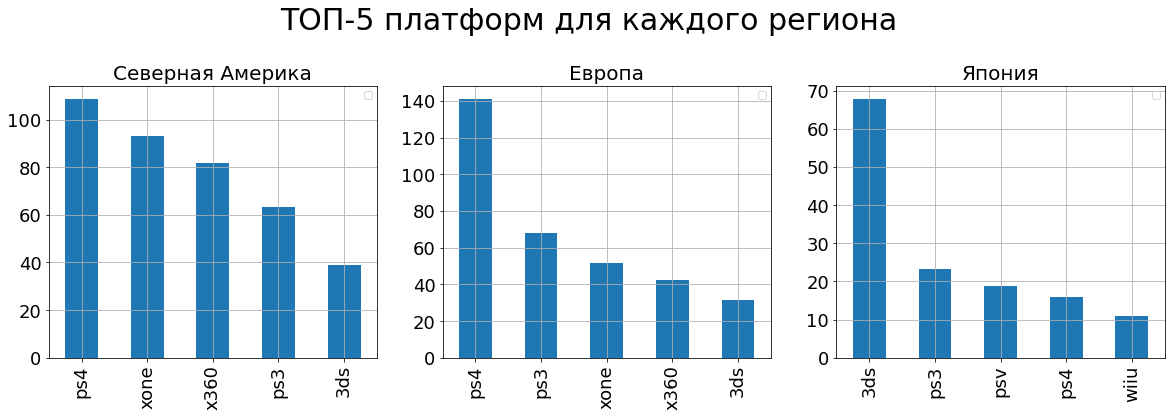

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle('ТОП-5 платформ для каждого региона',
             y = 1.1,
             fontsize = 30)
axes[0].set_title("Северная Америка")
axes[1].set_title("Европа")
axes[2].set_title("Япония")

fig.set_figheight(5)
fig.set_figwidth(20)

top_5('platform', 'na_sales', 0)
top_5('platform', 'eu_sales', 1)
top_5('platform', 'jp_sales', 2)

Построим рейтинг топ-5 самых популярных жанров по регионам, применим метод top_5() к столбцу `genre`.

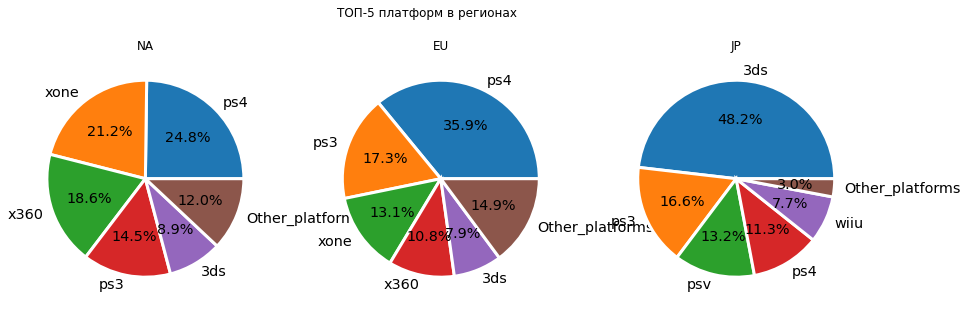

In [48]:
# задаем список регионов
countries = actual_games.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (actual_games.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_games[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

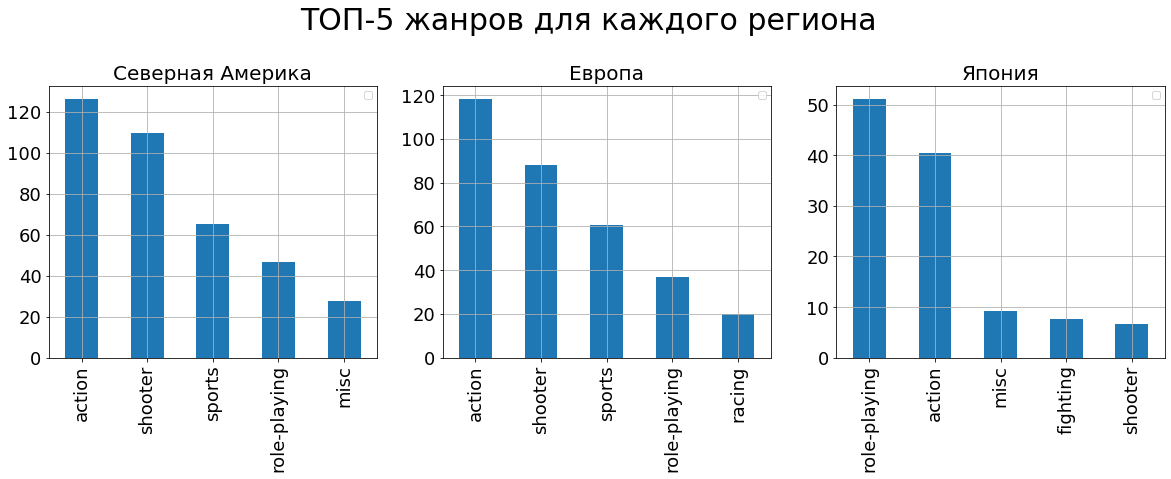

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle('ТОП-5 жанров для каждого региона',
             y = 1.1,
             fontsize = 30)
axes[0].set_title("Северная Америка")
axes[1].set_title("Европа")
axes[2].set_title("Япония")

fig.set_figheight(5)
fig.set_figwidth(20)

top_5('genre', 'na_sales', 0)
top_5('genre', 'eu_sales', 1)
top_5('genre', 'jp_sales', 2)

Построим графики влияния рейтинга  ESRB на продажи по регионам, применим метод top_5() к столбцу `rating`.

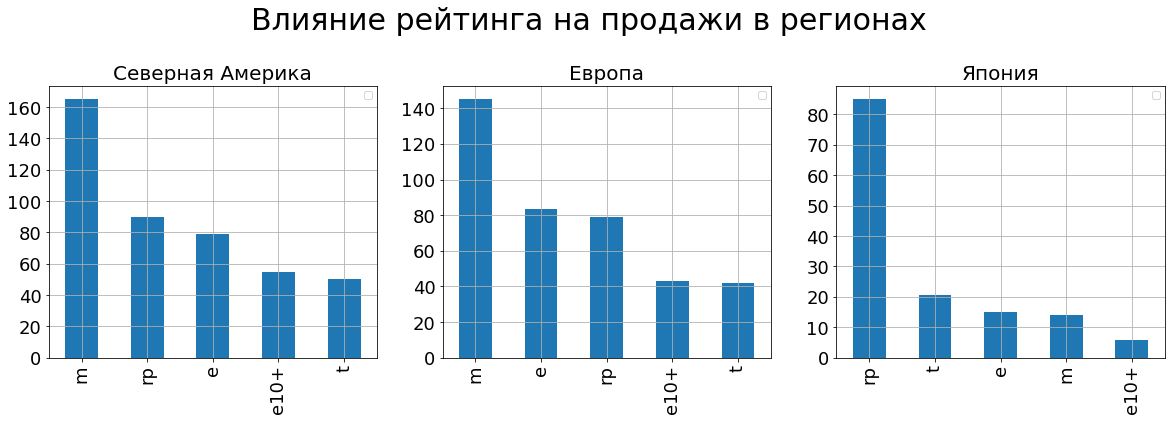

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
fig.suptitle('Влияние рейтинга на продажи в регионах',
             y = 1.1,
             fontsize = 30)
axes[0].set_title("Северная Америка")
axes[1].set_title("Европа")
axes[2].set_title("Япония")

fig.set_figheight(5)
fig.set_figwidth(20)

top_5('rating', 'na_sales', 0)
top_5('rating', 'eu_sales', 1)
top_5('rating', 'jp_sales', 2)

**Выводы:**

Предпочтения пользователей из **Северной Америки и Европы**, отличаются не очень сильно топ-5 платформ для этих регионов включает платформы: PS4, XOne, X360, PS3, 3DS. В обоих регионах самая популярная платформа **PS4**, на втором месте в Северной Америке платформа **XOne**, в Европе же она занимает 3 место, на втором месте в Европе платформа PS3, а в Северной Америке она лишь на 4-м. Замыкает рейтинг топ-5 платформа 3 DS.  Первые 4 места в топ-5 жанров в обоих регионах совпадает и включает в себя: **Action, Shooter, Sports, Role-Playing**,а замыкает рейтинг в **Европе Racing**, а в **Северной Америке Misc**. Самые популярные игры в Северной Америке и Европе имеют рейтинг **«M»** («Mature») — «От 17 лет».

В **Японии** же предпочетения пользователей сильно отличаются. В этом регионе на первом месте располагается платформа **3DS**,  также в топ-5 как и в Северной Америке и Европе входят **PS4** и **PS3**.
Топ-5 жанров в Японии также очень отличается: на 1 месте - **Role-Playing**, на 4 распологается Fighting, который также не вошел в топ-5 остальных регионов. Из портрета пользователей видно, что в Японии предпочитают более традиционные игры и отдают предпочтение классике, а также увлекаются играми с традиционными для восточных стран единоборствами. Самые популярные игры в Японии имеют рейтинг  **«rp»** (рейтинг был пропущен). Это связано с популярной для Японии платформой, игры для которой не оцениваются рейтингом ESRB.

Таким образом сделаем вывод, что рейтинг ESRB влияет на продажи в отдельных регионах.


## Проверка гипотез

Проверим следующие гипотезы: 
- средние пользовательские рейтинги платформ Xbox One и PC равны; 
- средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез избавимся от пропущенных значений пользовательского рейтинга в столбце `user_score`.   

In [51]:
actual_games = actual_games[['platform', 'genre', 'user_score']].dropna()

### Проверка первой гипотезы

Рассчитаем для платформ: среднее, стандартное отклонение и дисперсию для столбца `user_score`. Данные представим в сводной таблице.

In [52]:
actual_games_pivot_platform = actual_games.pivot_table(index=['platform'], values=['user_score'], aggfunc={'user_score': [np.mean, np.var, np.std]}).round(2)
actual_games_pivot_platform.columns = ['user_score_mean', 'user_score_std', 'user_score_var']
actual_games_pivot_platform.query('platform == "xone" | platform == "pc"') #выведем на экран данные по платформам, необходимые для проверки гипотез

,user_score_mean,user_score_std,user_score_var
platform,,,
pc,6.27,1.74,3.04
xone,6.52,1.38,1.91


Рассмотрим распределение оценок пользователей для каждой из платформ. Построим гистограмму по столбцу `user_score`.

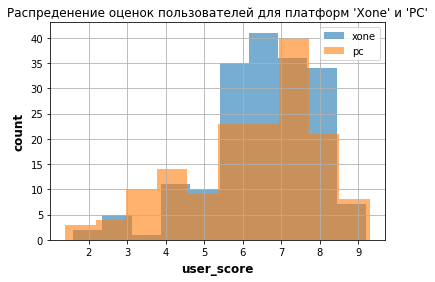

In [53]:
ax = actual_games.query('platform == "xone"').hist(column='user_score', bins=10, grid=True, alpha=0.6)
ax = actual_games.query('platform == "pc"').hist(column='user_score', bins=10, grid=True,  alpha=0.6, ax=ax)
ax[0][0].set_title("Распреденение оценок пользователей для платформ 'Xone' и 'PC'")
ax[0][0].set_xlabel("user_score", labelpad=5, weight='bold', size=12)
ax[0][0].set_ylabel("count", labelpad=5, weight='bold', size=12)
plt.legend(('xone', 'pc'));

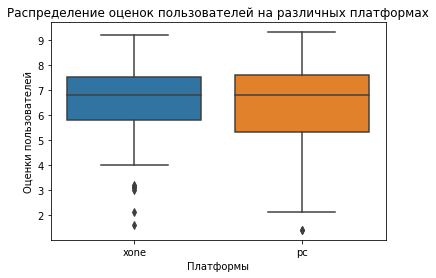

In [54]:
plt.title('Распределение оценок пользователей на различных платформах')
sns.boxplot(x='platform', y='user_score', data=actual_games.query('platform == "xone" | platform == "pc"'))
plt.xlabel('Платформы')
plt.ylabel('Оценки пользователей');

Распределение оценок пользователей для обоих платформ скошено влево. Среднее для PC	- 6.27, для XOne - 6.52, стандартное отклонение PC - 1.74, XOne - 1.38. Дисперсия у выборок отличается у PC - 3.04, у XOne - 1.91.

Проверим предположение о том, что средние пользовательские рейтинги платформ **Xbox One и PC** равны.

Для этого сформулируем **нулевую гипотезу:** 
H0 — средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

**Альтернативная гипотеза:** H1 — средние пользовательские рейтинги платформ Xbox One и PC различаются.

**Уровень статистической значимости** примем более строгий: **α=1%**

Для проверки гипотезы будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам **scipy.stats.ttest_ind (array1, array2, equal_var)**. 

Проверим условия применимости данного t-теста:
- генеральные совокупности не зависят друг от друга (пользовательские рейтинги платформ Xbox One и PC никак не влияют друг на друга);
- выборочные средние нормально распределены (объем выборок достаточно большой для подтверждения данного условия);
- дисперсии рассматриваемых генеральных совокупностей не равны (для параметра equal_var укажем значение False);

В случае, если полученный p-уровень значимости будет меньше принятого уровня статистической значимости, то отвергнем нулевую гипотезу, в ином случаем отвергнуть нулевую гипотезу не получится.

In [55]:
xbox = actual_games.query('platform == "xone"')['user_score'] # пользовательский рейтинг жанра Action
pc = actual_games.query('platform == "pc"')['user_score'] # пользовательский рейтинг жанра Sports

alpha = .01 #уровень статистической значимости

results = st.ttest_ind(
    xbox, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не получилось.
Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 15%, это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами платформы Xbox One и платформы PC.
Значит, что значимых различий между средними пользовательскими рейтингами платформы Xbox One и платформы PC не обнаружено.

### Проверка второй гипотезы

Рассчитаем для платформ: среднее, стандартное отклонение и дисперсию для столбца `user_score`. Данные представим в сводной таблице.

In [56]:
actual_games_pivot_genre = actual_games.pivot_table(index=['genre'], values=['user_score'], aggfunc={'user_score': [np.mean, np.var, np.std]}).round(2)
actual_games_pivot_genre.columns = ['user_score_mean', 'user_score_std', 'user_score_var']
actual_games_pivot_genre.query('genre == "action" | genre == "sports"') # выведем на экран данные по жанрам, необходимые для проверки гипотез

,user_score_mean,user_score_std,user_score_var
genre,,,
action,6.84,1.33,1.77
sports,5.24,1.78,3.18


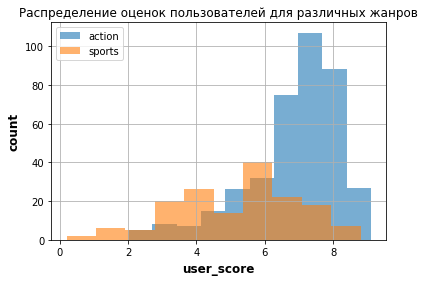

In [57]:
ax = actual_games.query('genre == "action"').hist(column='user_score', bins=10, grid=True, alpha=0.6)
ax = actual_games.query('genre == "sports"').hist(column='user_score', bins=10, grid=True,  alpha=0.6, ax=ax)
ax[0][0].set_title("Распределение оценок пользователей для различных жанров")
ax[0][0].set_xlabel("user_score", labelpad=5, weight='bold', size=12)
ax[0][0].set_ylabel("count", labelpad=5, weight='bold', size=12)
plt.legend(('action', 'sports'));

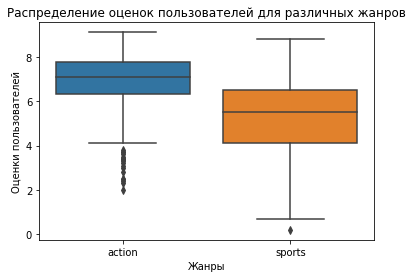

In [58]:
plt.title('Распределение оценок пользователей для различных жанров')
sns.boxplot(x='genre', y='user_score', data=actual_games.query('genre == "action" | genre == "sports"'))
plt.xlabel('Жанры')
plt.ylabel('Оценки пользователей');

Распределение оценок пользователей для обоих платформ скошено влево, для жанра 'Action' сильнее. Среднее двух жанров сильно отличается: для жанра 'Action'	- 6.84, для 'Sports' - 5.25, стандартное отклонение жанра 'Action' - 1.33, 'Sports' - 1.78. Дисперсия у выборок отличается у жанра 'Action' - 1.77, у 'Sports' - 3.18.

Проверим предположение о том, что средние пользовательские рейтинги жанров **Action** (англ. «действие», экшен-игры) и **Sports** (англ. «спортивные соревнования») разные.

Для этого сформулируем **нулевую гипотезу**: H0 — средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

**Альтернативная гипотеза**: H1 — средние пользовательские рейтинги жанров Action и Sports различаются.

**Уровень статистической значимости** примем более строгий: **α=1%**

Для проверки гипотезы будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам **scipy.stats.ttest_ind (array1, array2, equal_var)**. Проверим условия применимости данного t-теста:

- генеральные совокупности не зависят друг от друга (пользовательские рейтинги жанров Action и Sports никак не влияют друг на друга);
- выборочные средние нормально распределены (объем выборок достаточно большой для подтверждения данного условия);
- дисперсии рассматриваемых генеральных совокупностей не равны (для параметра equal_var укажем значение False).

В случае, если полученный p-уровень значимости будет меньше принятого уровня статистической значимости, то отвергнем нулевую гипотезу, в ином случаем отвергнуть нулевую гипотезу не получится.

In [59]:
action = actual_games.query('genre == "action"')['user_score'] # пользовательский рейтинг жанра Action
sports = actual_games.query('genre == "sports"')['user_score'] # пользовательский рейтинг жанра Sports

alpha = .01 # уровень статистической значимости

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4711831608728666e-20
Отвергаем нулевую гипотезу


Данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports различаются.

**Выводы:**
Статитистическая проверка гипотез показала, что значимых различий между средними пользовательскими рейтингами платформы *Xbox One* и платформы *PC* не обнаружено, а средние пользовательские рейтинги жанров *Action и Sports* **различаются**.

## Итоги исследования

Предобработали данные для дальнейшего анализа. Для этого: привели названия столбцов и содержащиеся в них категориальные данные к нижнему регистру, проверили данные в столбцах `Critic_Score`, `User_Score`, `Rating`, `Year_of_Release`  на аномалии и соответствие их значений из  документации. Аномалий в столбцах не обнаружено.

Составили описание данных и выяснили:
- уникальных названий **игр 11559**, самая часто встречающаяся игра **'Need for Speed: Most Wanted' (12)**; 
- уникальных **платформ 31**, самая распространенная **PS2 (2161)**; 
- уникальных **жанров игр 12**, самый популярный жанр **Action (3369)**. 


Обработали пропущенные значения в столбцах: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.
- Строки с пропущенными значениями `name` и `genre` – удалили, т.к. восстановить их не представляется возможным.
- Пропущенные значения в столбце `year_of_release` являются случайными, поэтому заполнили их средними значениями, исходя из названия платформы.
- Пропущенные значения в столбце `rating` заполнили значением 'pr' рейтинг ожидается.
- Пропущенные значения в столбцах `user_score`, `critic_score` заполнить корректно не представляется возможным, а удаление такого большого количества данных может повлиять на исследование, то оставили столбцы без изменения.
- Значение *'tbd'*  столбце `user_score` привели к *пропущенному значению*.


Заменили тип столбца `year_of_release` на 'int', тип данных столбца `user_score` на 'float'.	

Подсчитали количество явных и неявных дубликатов – **дубликатов** в данных **не обнаружено**.
Добавили столбец `total_sales` с суммарными продажами по всем регионам.
Построили гистограмму распределения количества игр по столбцу `year_of_release`, сделали вывод, что до 1993 года выпускалось очень мало игр, пик по объему выпускаемых игр приходится на 2007-2011, с 2012 количество игр резко пошло на спад.

С помощью сводной таблицы вычислили **топ-5 платформ** с наибольшими суммарными продажами по всем регионам: 
- PS2 - 1255.77 млн.шт, 
- X360 - 971.42 млн.шт,
- PS3 -  939.65 млн.шт, 
- Wii - 907.51 млн.шт,
- DS - 806.12 млн.шт.

Построили график распределения проданных игр на топ-5 платформах за каждый год.  По графику установили время появления и исчезновения платформы. Из графика установили актуальный период времени для составления прогноза на следующий период.
**Актуальными на 2016 год** остаются платформы **Wii, X360 и PS3**. По количеству проданных копий за период с 2005 года лидирует Wii, но с 2009 она потеряла свою популярность и сильно отстает от платформ X360 и PS3, которые можно назвать потенциально прибыльными. Уточним данные для более корректного прогноза на 2017 год, **будем использовать данные с 2013 года**, т.к. после этого года заметно резкое снижение количества игр.
Записали данные для дальнейшей работы в переменную actual_games.
Построили боксплот распределения количества проданных игр на различных платформах.
За актуальный период наибольшее количество проданных игр было у платформ **X360, PS4, XOne, WiiU, Wii**. Наименьшее количество игр у платформ PS3, PC, PSV, DC, PSP. В среднем популярные платформы продают по **0,2 млн. копий игр**, а наименее популярные меньше 0,05 млн.шт.
Для установленного актуального периода посмотрели распределение количества проданных игр по каждой популярной платформе, определили наиболее ***перспективные платформы: PS4, XOne, X360, WiiU***.

Рассмотрели зависимость объема проданных игр в зависимости от оценок пользователей и оценок критиков по каждой популярной платформе.

- для всех платформ связь общих **продаж и оценок критиков прямая и умеренная**; 
- для платформ  'ps4' , 'x360',  'xone' **связь оценок пользователей с количеством проданных копий отсутствует**, выделяется платформа 'wiiu' (связь прямая и умеренная);
- связь **оценок пользователей и оценок критиков** для платформ 'ps4',  'x360' **прямая и заметная**, для платформы 'xone' прямая и **умеренная**, а для платформы 'wiiu' прямая и **высокая**. 

Самое большое количеству проданных игр у жанров: 'Action', 'Shooter', высокие продажи у игр жанров 'Sport' и 'Role-Playing', самые низкие продажи у игр жанра 'Puzzle'. Однако по диаграмме размаха видно, что жанрами приносящими наибольшую прибыль являются: **'shooter', 'sport', 'platform'**. Меньше всего прибыли приносит жанр 'adventure'.

Составили портрет пользователей по регионам.

Предпочтения пользователей из **Северной Америки и Европы**, отличаются не очень сильно:
- топ-5 платформ для этих регионов включает платформы: PS4, XOne, X360, PS3, 3DS. В обоих регионах самая популярная платформа **PS4**, на втором месте в Северной Америке платформа **XOne**, в Европе же она занимает 3 место, на втором месте в Европе платформа PS3, а в Северной Америке она лишь на 4-м. Замыкает рейтинг топ-5 платформа 3 DS.  
- Первые 4 места в топ-5 жанров в обоих регионах совпадает и включает в себя: **Action, Shooter, Sports, Role-Playing**,а замыкает рейтинг в **Европе Racing**, а в **Северной Америке Misc**. 
- Самые популярные игры в Северной Америке и Европе имеют рейтинг **«M»** («Mature») — «От 17 лет».

В **Японии** же предпочетения пользователей сильно отличаются. 
- В этом регионе на первом месте располагается платформа **3DS**, также в топ-5 как и в Северной Америке и Европе входят **PS4** и **PS3**.
- Топ-5 жанров в Японии также очень отличается: на 1 месте - **Role-Playing**, на 4 распологается Fighting, который также не вошел в топ-5 остальных регионов. Из портрета пользователей видно, что в Японии предпочитают более традиционные игры и отдают предпочтение классике, а также увлекаются играми с традиционными для восточных стран единоборствами. 
- Самые популярные игры в Японии имеют рейтинг  **«rp»** (рейтинг был пропущен). Это связано с популярной для Японии платформой, игры для которой не оцениваются рейтингом ESRB.
 
Сделали вывод, что рейтинг ESRB влияет на продажи в отдельных регионах.

Проверили следующие гипотезы с использованием t-теста:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые (гипотеза подтвердилась)
- средние пользовательские рейтинги жанров Action и Sports разные (гипотеза подтвердилась).